<a href="https://colab.research.google.com/github/suurii/PreProject/blob/master/MultiNN_humen_action_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import lib


In [1]:
# for analyzing
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
import datetime

# for check file
from pathlib import Path
import numpy as np
import tensorflow as tf

# Download Data from csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filename = ['left_hand.csv','right_hand.csv','raise_hand.csv','spread_arms.csv','stand_facing.csv','stand_back.csv']
folder = '/content/drive/My Drive/data_prepj/'

if Path(folder+filename[0]).is_file():
  left_hand = pd.read_csv(folder+filename[0],header=0)
  right_hand = pd.read_csv(folder+filename[1],header=0)
  raise_hand = pd.read_csv(folder+filename[2],header=0)
  spread_arms = pd.read_csv(folder+filename[3],header=0)
  stand_facing = pd.read_csv(folder+filename[4],header=0)
  stand_back = pd.read_csv(folder+filename[5],header=0)
else:
  print('something wrong with reading file')

user = pd.concat([left_hand,right_hand,raise_hand,spread_arms,stand_facing,stand_back])



In [4]:
user

,nose_x,nose_y,nose,nose_score,leftEye_x,leftEye_y,leftEye,leftEye_score,rightEye_x,rightEye_y,rightEye,rightEye_score,leftEar_x,leftEar_y,leftEar,leftEar_score,rightEar_x,rightEar_y,rightEar,rightEar_score,leftShoulder_x,leftShoulder_y,leftShoulder,leftShoulder_score,rightShoulder_x,rightShoulder_y,rightShoulder,rightShoulder_score,leftElbow_x,leftElbow_y,leftElbow,leftElbow_score,rightElbow_x,rightElbow_y,rightElbow,rightElbow_score,leftWrist_x,leftWrist_y,leftWrist,leftWrist_score,rightWrist_x,rightWrist_y,rightWrist,rightWrist_score,leftHip_x,leftHip_y,leftHip,leftHip_score,rightHip_x,rightHip_y,rightHip,rightHip_score,leftKnee_x,leftKnee_y,leftKnee,leftKnee_score,rightKnee_x,rightKnee_y,rightKnee,rightKnee_score,leftAnkle_x,leftAnkle_y,leftAnkle,leftAnkle_score,rightAnkle_x,rightAnkle_y,rightAnkle,rightAnkle_score,label
0,394.550232,293.527283,0.623017,0.999169,400.124329,284.852814,0.807235,0.997579,388.142487,285.319672,0.802299,0.999652,404.151093,280.645264,0.906008,0.906929,381.269806,289.050995,0.766287,0.913360,418.343384,317.090790,0.5,0.981213,371.368378,331.007965,0.5,0.995849,442.000610,284.199860,1.259972,0.847550,365.744659,390.527405,1.481279,0.987077,456.549500,225.395462,2.374937,0.573238,358.686035,457.731781,2.826698,0.927063,405.145386,464.108826,2.866454,0.906021,377.821228,466.751617,2.933371,0.958748,403.554260,556.150696,4.740739,0.979373,374.057892,555.385132,4.740832,0.973208,401.622925,624.645203,6.137008,0.970285,381.524017,623.407959,6.116256,0.967961,left_hand
1,393.600311,285.925293,0.727533,0.999720,392.808319,278.051208,0.889336,0.998939,386.841858,277.726502,0.897558,0.999813,401.849792,279.424805,0.891923,0.955958,378.727081,281.631592,0.848536,0.931788,413.390808,313.823486,0.5,0.985051,367.299683,327.809204,0.5,0.997093,450.382935,283.720947,1.465201,0.852792,362.802154,384.932465,1.448768,0.983944,459.724457,230.271118,2.368249,0.574196,361.858795,451.776032,2.782487,0.987277,401.770050,461.432129,2.929001,0.939340,376.262726,462.061859,2.946994,0.966092,400.334534,554.155945,4.848895,0.964455,374.328644,549.205200,4.753319,0.984185,401.344788,620.593445,6.227982,0.979748,375.541656,615.679871,6.129491,0.949512,left_hand
2,393.843384,286.818481,0.731296,0.999633,391.446747,278.641571,0.895103,0.998694,387.063049,279.072846,0.888285,0.999764,401.613678,280.047272,0.896791,0.949309,378.533264,282.937897,0.841555,0.948127,413.655029,315.415710,0.5,0.988276,366.789276,329.375244,0.5,0.997338,455.151520,282.571258,1.557640,0.871146,363.039093,387.024597,1.433788,0.990567,461.703766,240.159531,2.228203,0.641024,360.372467,452.972321,2.739133,0.991651,401.719116,459.105835,2.805548,0.916283,375.204224,459.467377,2.819846,0.970333,402.323578,555.425293,4.771800,0.975098,375.012604,549.570923,4.656059,0.983137,399.809937,620.325745,6.095724,0.976610,374.063141,618.695923,6.068245,0.922464,left_hand
3,394.202759,288.307861,0.767824,0.999568,395.585602,279.496338,0.966608,0.998298,387.606567,279.229309,0.984737,0.999588,403.145447,280.892609,0.954821,0.939991,377.897278,283.747223,0.947710,0.847804,416.232727,317.778351,0.5,0.983150,372.814453,326.995331,0.5,0.994320,448.109802,303.601562,1.279317,0.928592,364.475586,387.073456,1.606930,0.965190,467.297272,266.324738,2.069668,0.775475,363.485718,453.114899,3.027142,0.976655,405.451080,458.907959,3.085621,0.918776,375.404724,460.594849,3.143441,0.970411,404.480865,553.726196,5.216838,0.969307,373.716980,547.816467,5.100455,0.976456,402.746552,621.966614,6.751993,0.977060,385.096191,621.715088,6.747128,0.964803,left_hand
4,397.331787,289.904053,0.728107,0.999342,401.802887,281.412689,0.918421,0.998314,389.374695,282.763855,0.900783,0.999244,403.577118,277.758545,1.002200,0.944690,380.884796,285.283020,0.903345,0.930744,419.751434,318.388306,0.5,0.976208,374.956604,328.195831,0.5,0.993283,450.839996,300.290008,1.269681,0.928436,366.775513,391.882080,1.637684,0.984988,471.772430,261.776794,2.105545,0.708773,362.387482,457.672546,3.028077,0.988429,408

# Preprocess Data


- Cleaning Data

In [5]:
#drop duplicate interpolate and rolling data
user_d = user.drop_duplicates()
user_d = user_d.interpolate(method='linear')
# user_d.iloc[:,0:67] = user_d.iloc[:,0:67].rolling(3).mean()

# user2_drop = user2.drop_duplicates()
# user2_drop = user2_drop.interpolate(method='linear')
# user2_drop.iloc[:,0:67] = user2_drop.iloc[:,0:67].rolling(3).mean()

# user2_drop = user2_drop.dropna(axis=0)
user_d = user_d.dropna(axis=0)
user_d = user_d.reset_index(drop=True)
# user2_drop = user2_drop.reset_index(drop=True)

In [6]:
# user = pd.concat([user1_drop,user2_drop])
# user
user_d['label']

0        left_hand
1        left_hand
2        left_hand
3        left_hand
4        left_hand
           ...    
1429    stand_back
1430    stand_back
1431    stand_back
1432    stand_back
1433    stand_back
Name: label, Length: 1434, dtype: object

In [7]:
# user_all = user_d.iloc[:,0:68].copy()
# user_all

- Normolize data

In [8]:
# norm = preprocessing.StandardScaler() 
# bin_encoder = preprocessing.LabelBinarizer()

# user_norm_ratio = pd.DataFrame(norm.fit_transform(user.iloc[:,[2,6,10,14,18,22,26,30,34,38,42,46,50,54,58,62,66]]))  #norm ratio data
# user_norm_coordinates = pd.DataFrame(norm.fit_transform(user.iloc[:,[0,1,4,5,8,9,12,13,16,17,20,21,24,25,28,29,32,33,36,37,40,41,44,45,48,49,52,53,56,57,60,61,64,65]]))
# user_norm_score = pd.DataFrame(norm.fit_transform(user.iloc[:,[3,7,11,15,19,23,27,31,35,39,43,47,51,55,59,63,67]]))
# user_label = bin_encoder.fit_transform(user['label'])
# user_label[:,1]

user_norm_ratio = user_d.iloc[:,[2,6,10,14,18,22,26,30,34,38,42,46,50,54,58,62,66]].copy()  #norm ratio data
user_norm_score = user_d.iloc[:,[3,7,11,15,19,23,27,31,35,39,43,47,51,55,59,63,67]].copy()
user_norm_ratio

,nose,leftEye,rightEye,leftEar,rightEar,leftShoulder,rightShoulder,leftElbow,rightElbow,leftWrist,rightWrist,leftHip,rightHip,leftKnee,rightKnee,leftAnkle,rightAnkle
0,0.623017,0.807235,0.802299,0.906008,0.766287,0.5,0.5,1.259972,1.481279,2.374937,2.826698,2.866454,2.933371,4.740739,4.740832,6.137008,6.116256
1,0.727533,0.889336,0.897558,0.891923,0.848536,0.5,0.5,1.465201,1.448768,2.368249,2.782487,2.929001,2.946994,4.848895,4.753319,6.227982,6.129491
2,0.731296,0.895103,0.888285,0.896791,0.841555,0.5,0.5,1.557640,1.433788,2.228203,2.739133,2.805548,2.819846,4.771800,4.656059,6.095724,6.068245
3,0.767824,0.966608,0.984737,0.954821,0.947710,0.5,0.5,1.279317,1.606930,2.069668,3.027142,3.085621,3.143441,5.216838,5.100455,6.751993,6.747128
4,0.728107,0.918421,0.900783,1.002200,0.903345,0.5,0.5,1.269681,1.637684,2.105545,3.028077,3.069947,3.080278,5.029236,5.082000,6.532955,6.566812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,18.281373,21.880675,23.192150,18.225301,25.689151,0.5,0.5,42.270954,90.713336,73.749323,110.408062,134.211766,140.275051,141.973750,138.929620,107.326109,107.682211
1430,0.611403,0.611769,0.739141,0.505657,0.454731,0.5,0.5,0.723092,0.912141,1.334466,1.319874,1.197371,1.376542,2.021835,1.993548,2.687244,2.638417
1431,0.543815,0.588438,0.619239,0.522499,0.396235,0.5,0.5,0.714894,0.804264,1.122024,2.280083,1.059490,1.136218,1.827526,1.763567,2.574331,2.573102
1432,0.507399,0.572842,0.625927,0.500381,0.414375,0.5,0.5,0.795882,0.859295,1.214809,1.310586,1.185086,1.002467,1.868964,1.852147,2.572067,2.505068


In [9]:
# user_norm_ratio.columns = ['nose', 'leftEye','rightEye','leftEar','rightEar','leftShoulder','rightShoulder','leftElbow','rightElbow','leftWrist','rightWrist','leftHip','rightHip','leftKnee','rightKnee','leftAnkle','rightAnkle',]

In [10]:
user_norm_ratio

,nose,leftEye,rightEye,leftEar,rightEar,leftShoulder,rightShoulder,leftElbow,rightElbow,leftWrist,rightWrist,leftHip,rightHip,leftKnee,rightKnee,leftAnkle,rightAnkle
0,0.623017,0.807235,0.802299,0.906008,0.766287,0.5,0.5,1.259972,1.481279,2.374937,2.826698,2.866454,2.933371,4.740739,4.740832,6.137008,6.116256
1,0.727533,0.889336,0.897558,0.891923,0.848536,0.5,0.5,1.465201,1.448768,2.368249,2.782487,2.929001,2.946994,4.848895,4.753319,6.227982,6.129491
2,0.731296,0.895103,0.888285,0.896791,0.841555,0.5,0.5,1.557640,1.433788,2.228203,2.739133,2.805548,2.819846,4.771800,4.656059,6.095724,6.068245
3,0.767824,0.966608,0.984737,0.954821,0.947710,0.5,0.5,1.279317,1.606930,2.069668,3.027142,3.085621,3.143441,5.216838,5.100455,6.751993,6.747128
4,0.728107,0.918421,0.900783,1.002200,0.903345,0.5,0.5,1.269681,1.637684,2.105545,3.028077,3.069947,3.080278,5.029236,5.082000,6.532955,6.566812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,18.281373,21.880675,23.192150,18.225301,25.689151,0.5,0.5,42.270954,90.713336,73.749323,110.408062,134.211766,140.275051,141.973750,138.929620,107.326109,107.682211
1430,0.611403,0.611769,0.739141,0.505657,0.454731,0.5,0.5,0.723092,0.912141,1.334466,1.319874,1.197371,1.376542,2.021835,1.993548,2.687244,2.638417
1431,0.543815,0.588438,0.619239,0.522499,0.396235,0.5,0.5,0.714894,0.804264,1.122024,2.280083,1.059490,1.136218,1.827526,1.763567,2.574331,2.573102
1432,0.507399,0.572842,0.625927,0.500381,0.414375,0.5,0.5,0.795882,0.859295,1.214809,1.310586,1.185086,1.002467,1.868964,1.852147,2.572067,2.505068


In [11]:
# user_norm_coordinates.columns = ['nose_x','nose_y','leftEye_x','leftEye_y','rightEye_x','rightEye_y','leftEar_x','leftEar_y','rightEar_x','rightEar_y','leftShoulder_x','leftShoulder_y','rightShoulder_x','rightShoulder_y','leftElbow_x','leftElbow_y','rightElbow_x','rightElbow_y','leftWrist_x','leftWrist_y','rightWrist_x','rightWrist_y','leftHip_x','leftHip_y','rightHip_x','rightHip_y','leftKnee_x','leftKnee_y','rightKnee_x','rightKnee_y','leftAnkle_x','leftAnkle_y','rightAnkle_x','rightAnkle_y']

In [12]:
# user_norm_coordinates

In [13]:
# user_norm_score.columns = ['nose_score','leftEye_score','rightEye_score','leftEar_score','rightEar_score','leftShoulder_score','rightShoulder_score','leftElbow_score','rightElbow_score','leftWrist_score','rightWrist_score','leftHip_score','rightHip_score','leftKnee_score','rightKnee_score','leftAnkle_score','rightAnkle_score']

In [14]:
user_norm_score

,nose_score,leftEye_score,rightEye_score,leftEar_score,rightEar_score,leftShoulder_score,rightShoulder_score,leftElbow_score,rightElbow_score,leftWrist_score,rightWrist_score,leftHip_score,rightHip_score,leftKnee_score,rightKnee_score,leftAnkle_score,rightAnkle_score
0,0.999169,0.997579,0.999652,0.906929,0.913360,0.981213,0.995849,0.847550,0.987077,0.573238,0.927063,0.906021,0.958748,0.979373,0.973208,0.970285,0.967961
1,0.999720,0.998939,0.999813,0.955958,0.931788,0.985051,0.997093,0.852792,0.983944,0.574196,0.987277,0.939340,0.966092,0.964455,0.984185,0.979748,0.949512
2,0.999633,0.998694,0.999764,0.949309,0.948127,0.988276,0.997338,0.871146,0.990567,0.641024,0.991651,0.916283,0.970333,0.975098,0.983137,0.976610,0.922464
3,0.999568,0.998298,0.999588,0.939991,0.847804,0.983150,0.994320,0.928592,0.965190,0.775475,0.976655,0.918776,0.970411,0.969307,0.976456,0.977060,0.964803
4,0.999342,0.998314,0.999244,0.944690,0.930744,0.976208,0.993283,0.928436,0.984988,0.708773,0.988429,0.948371,0.974015,0.975085,0.993366,0.967921,0.977678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,0.637922,0.323007,0.849889,0.052250,0.936959,0.083258,0.619751,0.415625,0.627877,0.569178,0.284345,0.219183,0.125404,0.145083,0.179250,0.071135,0.073490
1430,0.811967,0.949782,0.338267,0.932617,0.127043,0.827206,0.823460,0.894428,0.490595,0.878399,0.784633,0.737841,0.441689,0.657573,0.683095,0.447830,0.422187
1431,0.669841,0.869827,0.061499,0.910400,0.149731,0.855856,0.778556,0.891051,0.657232,0.932613,0.855894,0.455282,0.523040,0.788030,0.674108,0.465248,0.491637
1432,0.901783,0.933520,0.088053,0.965117,0.079073,0.896871,0.816971,0.965033,0.799987,0.948334,0.539347,0.860434,0.617298,0.883727,0.490847,0.307936,0.445485


- Label encoding

In [15]:
bin_encoder = preprocessing.LabelBinarizer()

user_label = bin_encoder.fit(np.array(user_d['label']))
user_label = pd.DataFrame(bin_encoder.transform(np.array(user_d['label'])))


In [16]:
user_label

,0,1,2,3,4,5
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1429,0,0,0,0,1,0
1430,0,0,0,0,1,0
1431,0,0,0,0,1,0
1432,0,0,0,0,1,0


In [17]:
# from keras.utils import to_categorical    # similar to one-hot encoding

# user_labels = to_categorical(user_label)


In [18]:
user_label.columns = ['left_hand','right_hand','raise_hand','spread_arms','stand_back','stand_facing']
user_label

,left_hand,right_hand,raise_hand,spread_arms,stand_back,stand_facing
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1429,0,0,0,0,1,0
1430,0,0,0,0,1,0
1431,0,0,0,0,1,0
1432,0,0,0,0,1,0


- merge data

In [19]:
# #merge all column
# user_norm = pd.merge(user_norm_ratio,user_norm_coordinates,left_index=True,right_index=True)
user_norm = pd.merge(user_norm_ratio,user_norm_score,left_index=True,right_index=True)
user_norm = pd.merge(user_norm,user_label,left_index=True,right_index=True)

In [20]:
user_norm.shape

(1434, 40)

In [21]:
import plotly.graph_objects as go

from plotly.offline import iplot

data = [
        go.Scatter(y=user_norm['nose'], name='nose',mode='markers',marker=dict(colorscale='Viridis')),
        go.Scatter(y=user_norm['leftEye'], name='leftEye',mode='markers',marker=dict(colorscale='Viridis')),
        go.Scatter(y=user_norm['rightEye'], name='rightEye',mode='markers',marker=dict(colorscale='Viridis')),
        go.Scatter(y=user_norm['leftEar'], name='leftEar',mode='markers',marker=dict(colorscale='Viridis')),
]

layout = go.Layout(title='data')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

- Time seseries 

In [22]:
t_step = 5
t_stride = 3
data_slide = []

for i in range(0,user_norm.shape[0]-t_step,t_stride):
  data_slide.append(user_norm.iloc[i:i+t_step,:].values)
data_slide = np.array(data_slide)

data_slide.shape

(477, 5, 40)

In [23]:
data_slide

array([[[ 0.62301689,  0.80723455,  0.80229919, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.72753277,  0.88933573,  0.89755767, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.73129625,  0.89510255,  0.88828506, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.76782416,  0.96660755,  0.98473669, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.72810732,  0.91842077,  0.90078343, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.76782416,  0.96660755,  0.98473669, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.72810732,  0.91842077,  0.90078343, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.78781956,  0.95246904,  0.90263608, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.76989515,  0.88887574,  0.90888432, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.87215739,  0.9954098 ,  1.0323959 , ...,  0.        ,
          0.  

In [24]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_slide[:,:,0:34] , data_slide[:, 4, 34:40], test_size=0.2, random_state=77, stratify = data_slide[:, 4,34:40] )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(381, 5, 34)
(96, 5, 34)
(381, 6)
(96, 6)


# Train Model

- import libraly

In [25]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import datasets, layers, models,optimizers
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# cnn model
from numpy import mean
from numpy import std
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

Instructions for updating:
non-resource variables are not supported in the long term


- defind model CNN

In [26]:
# def evaluate_model(trainX, trainy, testX, testy):
trainX, trainy, testX, testy = X_train,y_train, X_test , y_test
verbose, epochs, batch_size = 2,80, 32
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
model = models.Sequential()
model.add(layers.Conv1D(filters=128, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features),padding='same'))
model.add(layers.Conv1D(filters=64, kernel_size=4, activation='relu',padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Dropout(0.5))

model.add(layers.Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features),padding='same'))
model.add(layers.Conv1D(filters=32, kernel_size=4, activation='relu',padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)

# evaluate model
# _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
# return accuracy

Train on 381 samples
Epoch 1/80
381/381 - 3s - loss: 1.9198 - acc: 0.2152
Epoch 2/80
381/381 - 0s - loss: 1.7908 - acc: 0.3885
Epoch 3/80
381/381 - 0s - loss: 1.6840 - acc: 0.4593
Epoch 4/80
381/381 - 0s - loss: 1.5446 - acc: 0.4462
Epoch 5/80
381/381 - 0s - loss: 1.4246 - acc: 0.4593
Epoch 6/80
381/381 - 0s - loss: 1.6013 - acc: 0.4541
Epoch 7/80
381/381 - 0s - loss: 1.2777 - acc: 0.4987
Epoch 8/80
381/381 - 0s - loss: 1.2075 - acc: 0.5223
Epoch 9/80
381/381 - 0s - loss: 1.3577 - acc: 0.5276
Epoch 10/80
381/381 - 0s - loss: 1.1040 - acc: 0.5617
Epoch 11/80
381/381 - 0s - loss: 1.1942 - acc: 0.5591
Epoch 12/80
381/381 - 0s - loss: 1.0445 - acc: 0.5591
Epoch 13/80
381/381 - 0s - loss: 0.9931 - acc: 0.5722
Epoch 14/80
381/381 - 0s - loss: 0.9185 - acc: 0.6010
Epoch 15/80
381/381 - 0s - loss: 0.8852 - acc: 0.6010
Epoch 16/80
381/381 - 0s - loss: 0.9309 - acc: 0.5932
Epoch 17/80
381/381 - 0s - loss: 0.8559 - acc: 0.6089
Epoch 18/80
381/381 - 0s - loss: 0.8331 - acc: 0.6299
Epoch 19/80
381/

In [27]:
# def summarize_results(scores):
# 	print(scores)
# 	m, s = mean(scores), std(scores)
# 	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 
# # run an experiment
# def run_experiment(repeats=10):
# 	# load data
# 	trainX, trainy, testX, testy = X_train,y_train, X_test , y_test
# 	# repeat experiment
# 	scores = list()
# 	for r in range(repeats):
# 		score = evaluate_model(trainX, trainy, testX, testy)
# 		score = score * 100.0
# 		print('>#%d: %.3f' % (r+1, score))
# 		scores.append(score)
# 	# summarize results
# 	summarize_results(scores)
 
# # run the experiment
# run_experiment()

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.86      0.92      0.89        13
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        12
           4       0.96      0.92      0.94        24
           5       0.91      0.91      0.91        22

    accuracy                           0.92        96
   macro avg       0.91      0.92      0.92        96
weighted avg       0.92      0.92      0.92        96



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



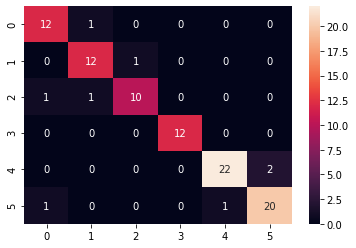

In [28]:
y_predict_CNN = model.predict(X_test)
y_pred_single_CNN = [np.argmax(p) for p in y_predict_CNN]
y_test_single_CNN = [np.argmax(p) for p in y_test]


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(classification_report(y_test_single_CNN, y_pred_single_CNN))
sns.heatmap(confusion_matrix(y_test_single_CNN, y_pred_single_CNN),annot=True)

['sit','stand_facing','stand_back','stand_with_left_hand','stand_with_right_hand']

In [29]:
y_predict_CNN


array([[5.24083823e-02, 1.89405936e-03, 8.62440348e-01, 8.23185295e-02,
        8.92441021e-04, 4.61970521e-05],
       [1.29592465e-07, 4.29598761e-12, 6.18966851e-08, 5.34821858e-08,
        9.99998331e-01, 1.47123717e-06],
       [2.12544705e-06, 3.42891243e-10, 3.36873472e-06, 9.83863941e-08,
        2.84388193e-07, 9.99994159e-01],
       [2.87504979e-27, 5.99517410e-37, 1.45804619e-24, 7.09626462e-29,
        7.87311557e-22, 1.00000000e+00],
       [9.18827514e-10, 4.84014379e-14, 1.40644485e-09, 5.45172796e-10,
        9.99999642e-01, 2.99327667e-07],
       [2.85506012e-05, 1.01810929e-06, 1.42306844e-02, 1.81785959e-03,
        1.24017755e-03, 9.82681692e-01],
       [2.55182246e-03, 5.36540784e-02, 9.59991943e-04, 9.42829728e-01,
        3.62761767e-07, 3.97581425e-06],
       [3.04446823e-09, 6.75282999e-15, 7.77713982e-09, 8.36319902e-10,
        1.00000000e+00, 5.43624079e-09],
       [1.00509971e-01, 2.25700557e-01, 5.37358701e-01, 3.33195515e-02,
        8.60127732e-02, 

In [30]:
#import os
#save_dir = os.path.join(os.getcwd(), 'saved_models') # save model 
# model_name = 'model.h5' # filename of saved model
#if not os.path.isdir(save_dir):
#   os.makedirs(save_dir)
#model_path = os.path.join(save_dir, model_name)
#model.save(model_path)
#print('Saved trained model at %s ' % model_path)

export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)


INFO:tensorflow:Assets written to: saved_model/1/assets


In [31]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from saved_model/1/variables/variables
INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default'}
INFO:tensorflow:input tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv1d_input
INFO:tensorflow: tensor name: serving_default_conv1d_input:0, shape: (-1, 5, 34), type: DT_FLOAT
INFO:tensorflow:output tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_1
INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 6), type: DT_FLOAT
INFO:tensorflow:Restoring parameters from saved_model/1/variables/variables
Instructions for updating:
Use `tf.compat.v1.graph_util.con

Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the f

In [32]:
import pathlib
tflite_model_file = pathlib.Path('modelja.tflite')
tflite_model_file.write_bytes(tflite_model)

377748

In [33]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
#del model

In [35]:
# Restore model from model_path
# from keras.models import load_model
#import tensorflow as tf 
#model = tf.keras.models.load_model(model_path)

In [36]:
#scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

NameError: ignored

In [ ]:
try :
  %tensorfloe_verdion 2.x
except :
  pass 

In [ ]:
npm install node-media-server --save

In [ ]:
#server/app.js

const node_media_server = require('./media_server');

node_media_server.run();